In [1]:
import numpy as np
import torch

seed = 42 #424
np.random.seed(seed)
torch.manual_seed(seed)
#NOTE! This only works for non cudnn. gpu needs
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from helpers import showcase_code

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

import pandas as pd

In [2]:
# for working with external files, otherwise kernels needs to be restarted each time
%load_ext autoreload
%autoreload 2

In [3]:
save_file = 'pickles\\DropoutModel_toy_True_100.pkl'
save_file = 'pickles\\SaverModel_toy_True_100.pkl'
save_file = "pickles\\nn_models.ensembles.BootstrapEnsemble_toy_True_100.pkl"
save_file = 'pickles\\nn_models.ensembles.ShuffleEnsemble_toy_True_100.pkl'
save_file = 'pickles\\nn_models.base_ensemble.VanillaEnsemble_toy_True_100.pkl'
save_file = 'pickles\\BobstrapEnsemble_toy_True_100.pkl'   
save_file = 'pickles\\BobstrapEnsemble_toy_True_100.pkl'

with  open(save_file, "rb") as f:
    exp = pickle.load(f)

In [4]:
len(exp.stats_dict['post_training']['means'])

100

In [5]:
from experimentation import ExperimentAnalyzer

In [6]:
analyzer = ExperimentAnalyzer(exp)

In [7]:
analyzer.analysis()

0.39324277646277234 0.05251562128064577
0.40221251565458443 0.32663942003881596
0.23966526641551322 0.30722207739003116
-0.6351836350018035 0.5178884822457276


,nlpd,errors,cobeau,cobeau_p_vals
0,-0.419143,0.441146,0.036017,0.890845
1,-0.681538,0.349048,0.162576,0.533003
2,-0.180052,0.408658,0.334356,0.189616
3,-0.557394,0.423557,0.779763,0.000223
4,-0.806621,0.469082,0.862091,0.000009
...,...,...,...,...
95,-1.453428,0.336852,0.760850,0.000390
96,-0.805958,0.414132,0.705303,0.001563
97,-0.653861,0.406577,0.226807,0.381351
98,-1.197369,0.385374,0.788247,0.000171


In [8]:
analyzer.get_outlier_indices()

C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:179: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)


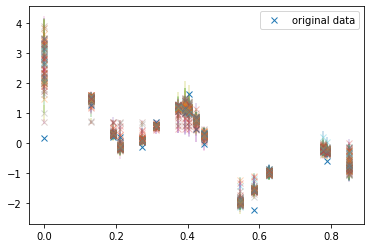

In [9]:
analyzer.plot_outcomes()

In [10]:
df = analyzer.analysis()

0.3893173238308971 0.03528215018339231
0.401552024383295 0.328218518765586
0.24149623924912944 0.3082264534587144
-0.6609794987132912 0.4520785309508823


In [11]:
df.describe()

,nlpd,errors,cobeau,cobeau_p_vals
count,99.000000,99.000000,99.000000,9.900000e+01
mean,-0.660979,0.389317,0.401552,2.414962e-01
std,0.454379,0.035462,0.329889,3.097950e-01
min,-1.537395,0.304785,-0.378765,9.151741e-08
25%,-1.005793,0.362283,0.163737,1.464155e-03
50%,-0.669537,0.388867,0.447978,7.133623e-02
75%,-0.434733,0.417105,0.708323,4.172388e-01
max,1.140814,0.469082,0.926665,9.873665e-01


In [12]:
print(df.describe().to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &       nlpd &     errors &     cobeau &  cobeau\_p\_vals \\
\midrule
count &  99.000000 &  99.000000 &  99.000000 &   9.900000e+01 \\
mean  &  -0.660979 &   0.389317 &   0.401552 &   2.414962e-01 \\
std   &   0.454379 &   0.035462 &   0.329889 &   3.097950e-01 \\
min   &  -1.537395 &   0.304785 &  -0.378765 &   9.151741e-08 \\
25\%   &  -1.005793 &   0.362283 &   0.163737 &   1.464155e-03 \\
50\%   &  -0.669537 &   0.388867 &   0.447978 &   7.133623e-02 \\
75\%   &  -0.434733 &   0.417105 &   0.708323 &   4.172388e-01 \\
max   &   1.140814 &   0.469082 &   0.926665 &   9.873665e-01 \\
\bottomrule
\end{tabular}



0.3893173238308971 0.03528215018339231
0.401552024383295 0.328218518765586
0.24149623924912944 0.3082264534587144
-0.6609794987132912 0.4520785309508823


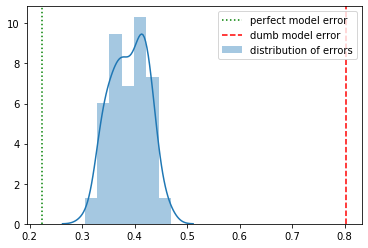

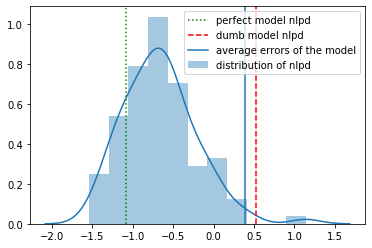

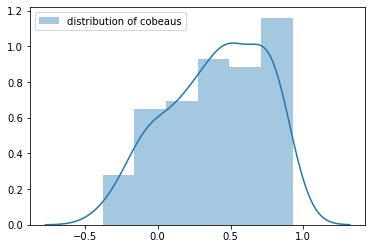

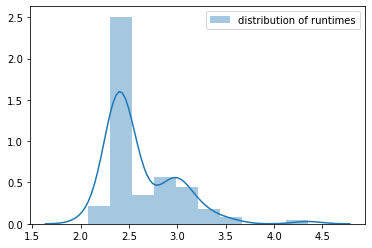

In [13]:
analyzer.plot_distribution_of_metrics()


99
15 4
 this many models: (100, 10)
cobeau: (0.4079012214137472, 0.1040937427955505)
nlpd: -1.370243738233313.
 nlpds of just mean and just std of the model:
0.5377464136941734


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:15: RuntimeWarning: invalid value encountered in log
  nlpd = 1/2 * ((y-y_pred)**2 / y_std) + np.log(y_std)


nan
error: 0.3047853589209111
 this many models: (100, 10)
cobeau: (0.8620913488157009, 8.60178366419956e-06)
nlpd: -0.8066211720818047.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.46908197180101857


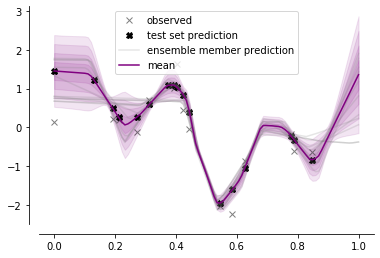

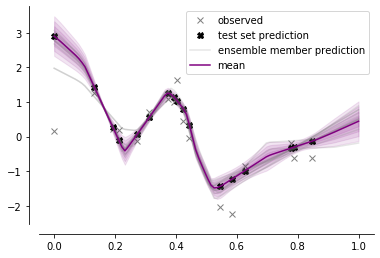

In [14]:
analyzer.plot_models()

99
31 78
 this many models: (100, 10)
cobeau: (-0.3787654752072177, 0.13380709138038382)
nlpd: 0.3870064049112577.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.34356896480499216
 this many models: (100, 10)
cobeau: (0.9266649662530649, 9.151740724978587e-08)
nlpd: -0.8722256418702943.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.41001891665016654


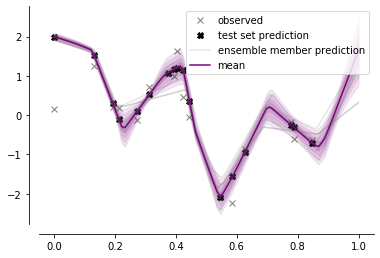

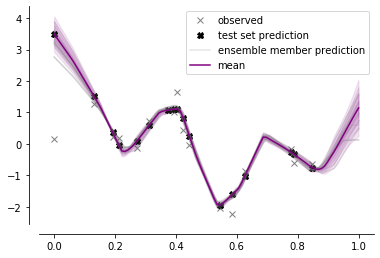

In [15]:
analyzer.plot_models('cobeau')

99
68 71
 this many models: (100, 10)
cobeau: (0.4781221959587383, 0.05222665709316995)
nlpd: -1.537395001064949.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.3266034265820444
 this many models: (100, 10)
cobeau: (-0.009271238113254393, 0.971828521503922)
nlpd: 1.140813620126473.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.4089609408405243


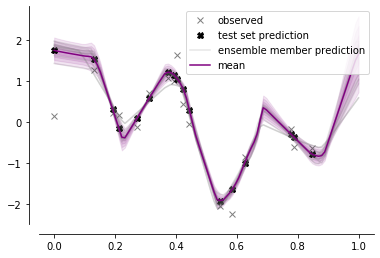

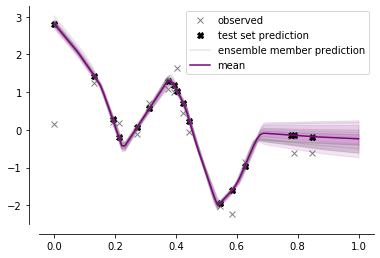

In [16]:
analyzer.plot_models('nlpd')

number of outliers: 1


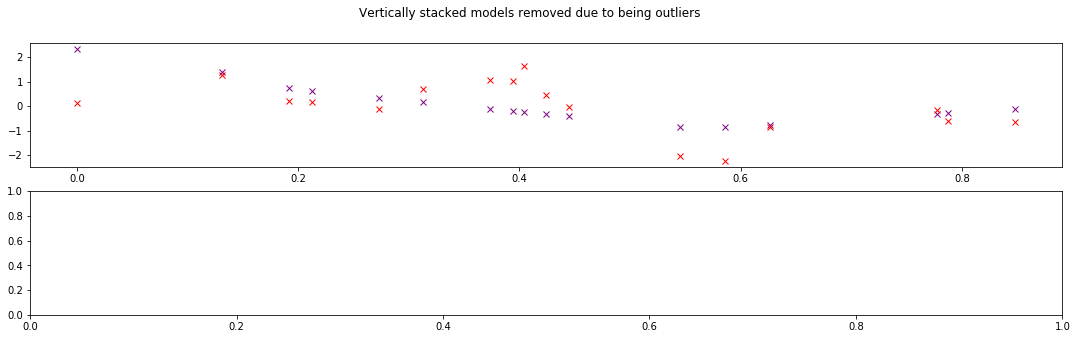

In [17]:
analyzer.plot_outlier_models()